# [공공데이터 코로나19 시도별 현황자료](https://www.data.go.kr/data/15043378/openapi.do)

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# url을 가져와서 문서로 만드는 작업
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [121]:
with open('data/roadapikey.txt') as f:
  api_key = f.read()
len(api_key)

102

In [122]:
key= api_key
numRows=10
staD=str(20200410)
endD=str(20210831)
numRows=30

In [123]:


#------------
url1='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+ key
url2='&pageNo=1&numOfRows='+str(numRows)
url3='&startCreateDt='+staD+'&endCreateDt='+endD
url=url1+url2+url3   

#print(url)

In [49]:

#------------
xml=requests.get(url)
soup=bs(xml.text,'html.parser')
#soup

In [124]:

#------------
data=soup.find_all('item')
con_lst=[]

for item in data:
    DEF_CNT = item.find('defcnt').text # 확진자수'
    Deat_CNT = item.find('deathcnt').text # 사망자수
    GUBUN = item.find('gubun').text # 지역'
    INC_DEC = item.find('incdec').text #전일대비 증감'
    STD_DAY = item.find('stdday').text # 기준일'
    ISOL_ING_CNT = item.find('isolingcnt').text#격리자수'
    OVER_FLOW_CNT = item.find('overflowcnt').text #해외유입'
    LOCAL_OCC_CNT = item.find('localocccnt').text #지역감염'
    con_lst.append({'stdday':STD_DAY,'ji':GUBUN,'isolingcnt':ISOL_ING_CNT,
                    'defcnt':DEF_CNT,'incdec':INC_DEC,'deathcnt':Deat_CNT,
                    'local':LOCAL_OCC_CNT,'overflow':OVER_FLOW_CNT})


In [125]:
con_lst

[{'stdday': '2021년 08월 31일 00시',
  'ji': '검역',
  'isolingcnt': '511',
  'defcnt': '5836',
  'incdec': '13',
  'deathcnt': '13',
  'local': '0',
  'overflow': '13'},
 {'stdday': '2021년 08월 31일 00시',
  'ji': '제주',
  'isolingcnt': '270',
  'defcnt': '2602',
  'incdec': '9',
  'deathcnt': '2',
  'local': '8',
  'overflow': '1'},
 {'stdday': '2021년 08월 31일 00시',
  'ji': '경남',
  'isolingcnt': '858',
  'defcnt': '9980',
  'incdec': '56',
  'deathcnt': '31',
  'local': '56',
  'overflow': '0'},
 {'stdday': '2021년 08월 31일 00시',
  'ji': '경북',
  'isolingcnt': '618',
  'defcnt': '7100',
  'incdec': '27',
  'deathcnt': '88',
  'local': '27',
  'overflow': '0'},
 {'stdday': '2021년 08월 31일 00시',
  'ji': '전남',
  'isolingcnt': '206',
  'defcnt': '2600',
  'incdec': '14',
  'deathcnt': '19',
  'local': '13',
  'overflow': '1'},
 {'stdday': '2021년 08월 31일 00시',
  'ji': '전북',
  'isolingcnt': '354',
  'defcnt': '3588',
  'incdec': '26',
  'deathcnt': '60',
  'local': '26',
  'overflow': '0'},
 {'stdday': '

In [126]:
# 데이터프레임 제작
df = pd.DataFrame(con_lst)
df

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
0,2021년 08월 31일 00시,검역,511,5836,13,13,0,13
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1
...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,145,3262,15,41,14,1
512,2021년 08월 04일 00시,대전,1121,4459,59,30,59,0
513,2021년 08월 04일 00시,광주,215,3464,16,24,15,1
514,2021년 08월 04일 00시,인천,1144,9342,83,66,83,0


In [127]:
# 데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   isolingcnt  516 non-null    object
 3   defcnt      516 non-null    object
 4   incdec      516 non-null    object
 5   deathcnt    516 non-null    object
 6   local       516 non-null    object
 7   overflow    516 non-null    object
dtypes: object(8)
memory usage: 32.4+ KB


In [128]:
# 데이터 결측치 확인
df.isna().sum()

stdday        0
ji            0
isolingcnt    0
defcnt        0
incdec        0
deathcnt      0
local         0
overflow      0
dtype: int64

## 형변환

In [129]:
df['isolingcnt'] = df['isolingcnt'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   isolingcnt  516 non-null    int32 
 3   defcnt      516 non-null    object
 4   incdec      516 non-null    object
 5   deathcnt    516 non-null    object
 6   local       516 non-null    object
 7   overflow    516 non-null    object
dtypes: int32(1), object(7)
memory usage: 30.4+ KB


In [131]:
# 방법1
df['defcnt'] = df['defcnt'].astype(int)
df['deathcnt'] = df['deathcnt'].astype(int)
df['local'] = df['local'].astype(int)
df['overflow'] = df['overflow'].astype(int)
df['incdec'] = df['incdec'].astype(int)

In [132]:
# 방법2
col = list(df.columns[2:])

for i in col:
    df[col] = df[col].astype(int)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   isolingcnt  516 non-null    int32 
 3   defcnt      516 non-null    int32 
 4   incdec      516 non-null    int32 
 5   deathcnt    516 non-null    int32 
 6   local       516 non-null    int32 
 7   overflow    516 non-null    int32 
dtypes: int32(6), object(2)
memory usage: 20.3+ KB


In [134]:
df.head()

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
0,2021년 08월 31일 00시,검역,511,5836,13,13,0,13
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1


## 자료기술통계

In [135]:
df.describe()

,isolingcnt,defcnt,incdec,deathcnt,local,overflow
count,516.000000,516.000000,516.000000,516.000000,516.00000,516.000000
mean,2626.494186,22719.133721,173.676357,216.153101,168.50000,5.186047
std,5870.341145,50167.372319,382.427085,475.594796,372.40069,11.778550
min,70.000000,763.000000,1.000000,1.000000,0.00000,0.000000
25%,332.000000,3621.250000,25.000000,24.000000,23.00000,0.000000
50%,602.000000,5560.500000,46.500000,57.000000,46.00000,1.000000
75%,1168.500000,10628.000000,90.000000,128.000000,89.00000,3.000000
max,28214.000000,251415.000000,2221.000000,2285.000000,2144.00000,77.000000


In [136]:
# 날짜도 변환해야 함
df['stdday'].describe()

count                   516
unique                   28
top       2021년 08월 31일 00시
freq                     19
Name: stdday, dtype: object

In [137]:
df[df['defcnt']>100000]

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
18,2021년 08월 31일 00시,합계,27429,251415,1370,2285,1331,39
37,2021년 08월 30일 00시,합계,27403,250045,1485,2284,1424,61
56,2021년 08월 29일 00시,합계,27555,248560,1619,2279,1576,43
75,2021년 08월 28일 00시,합계,27678,246943,1791,2276,1736,55
94,2021년 08월 27일 00시,합계,28214,245152,1838,2265,1808,30
113,2021년 08월 26일 00시,합계,28186,243314,1882,2257,1829,53
132,2021년 08월 25일 00시,합계,28019,241433,2154,2237,2113,41
151,2021년 08월 24일 00시,합계,27859,239280,1506,2228,1468,38
170,2021년 08월 23일 00시,합계,27949,237772,1416,2222,1369,47
189,2021년 08월 22일 00시,합계,27864,236355,1626,2215,1588,38


In [138]:
df[df['ji'] =='제주']

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
20,2021년 08월 30일 00시,제주,303,2593,12,2,12,0
39,2021년 08월 29일 00시,제주,341,2581,13,2,12,1
58,2021년 08월 28일 00시,제주,373,2568,21,2,19,2
77,2021년 08월 27일 00시,제주,399,2547,23,2,23,0
96,2021년 08월 26일 00시,제주,401,2524,30,2,30,0
115,2021년 08월 25일 00시,제주,428,2494,27,2,27,0
134,2021년 08월 24일 00시,제주,447,2467,30,2,30,0
153,2021년 08월 23일 00시,제주,471,2437,32,1,32,0
172,2021년 08월 22일 00시,제주,473,2405,35,1,35,0


In [78]:
# 합계자료가 섞여서 데이터를 전처리 해야 함
df[df['stdday'] =='2021년 08월 31일 00시']

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
0,2021년 08월 31일 00시,검역,511,5836,13,13,0,13
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0
6,2021년 08월 31일 00시,충남,1098,6937,38,55,37,1
7,2021년 08월 31일 00시,충북,455,5152,15,73,15,0
8,2021년 08월 31일 00시,강원,396,5460,30,59,29,1
9,2021년 08월 31일 00시,경기,8733,71081,433,747,419,14


In [79]:
# 합계와 검역 테이블은 이상치 데이터로 삭제해야 함
df['defcnt'].groupby(df['ji']).sum()

ji
강원     126546
검역     157110
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
합계    5557598
Name: defcnt, dtype: int32

## 데이터 전처리
- 합계와 검역 자료 제거
- 날짜데이터 형식을 날짜로 변경, 년월일로 쪼갬

In [82]:
# 조건에 맞는 데이터 제거 후 새로운 데이터프레임 제작
# 방법1
newDf = df[(df['ji']!='검역')&(df['ji']!='합계')]
newDf['defcnt'].groupby(df['ji']).sum()
# 방법2 newDf = df 를 하고 조건에 맞는 자료만 drop 하기 행단위 axis=0
# 방법3 newDf = df 를 하고 조건에 맞는 자료를 NaN으로 변경한 뒤 dropna로 제거

ji
강원     126546
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
Name: defcnt, dtype: int32

In [83]:
newDf.corr()

,isolingcnt,defcnt,incdec,deathcnt,local,overflow
isolingcnt,1.000000,0.993543,0.969242,0.942039,0.969495,0.720412
defcnt,0.993543,1.000000,0.968791,0.962850,0.968815,0.731520
incdec,0.969242,0.968791,1.000000,0.942731,0.999914,0.760173
deathcnt,0.942039,0.962850,0.942731,1.000000,0.941928,0.752914
local,0.969495,0.968815,0.999914,0.941928,1.000000,0.751582
overflow,0.720412,0.731520,0.760173,0.752914,0.751582,1.000000


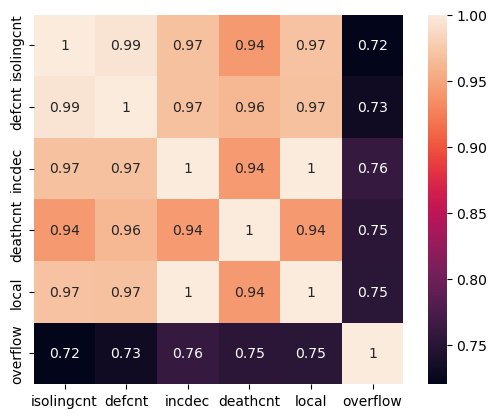

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(newDf.corr(), square=True, annot=True)
plt.show()

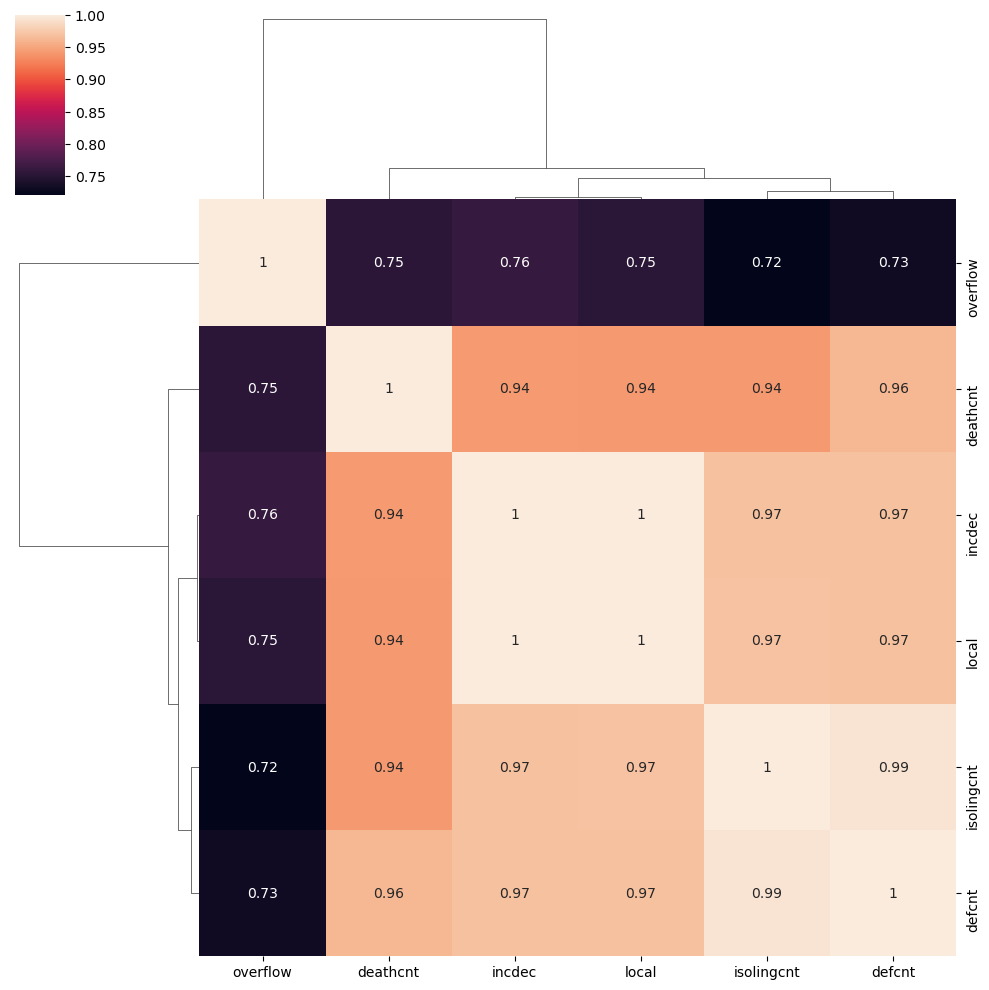

In [92]:
sns.clustermap(newDf.corr(), annot=True)
plt.show()

In [96]:
# 날짜 확인 후 변경, 년-월-일
# 방법1
newDf['Date'] = newDf['stdday'].str.split('일').str[0]
newDf['Date'] = newDf['Date'].str.replace('년','-')
newDf['Date'] = newDf['Date'].str.replace('월','-')
newDf['Date'] = newDf['Date'].str.replace(' ','')
newDf.head()

#방법2 for문으로 돌리기(속도가 더 빠름)

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow,Date
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1,2021-08-31
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0,2021-08-31
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0,2021-08-31
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1,2021-08-31
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0,2021-08-31


In [98]:
newDf.info()
# 날짜형식 object -> date로 바꿔야 함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 1 to 515
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      464 non-null    object
 1   ji          464 non-null    object
 2   isolingcnt  464 non-null    int32 
 3   defcnt      464 non-null    int32 
 4   incdec      464 non-null    int32 
 5   deathcnt    464 non-null    int32 
 6   local       464 non-null    int32 
 7   overflow    464 non-null    int32 
 8   Date        464 non-null    object
dtypes: int32(6), object(3)
memory usage: 41.5+ KB


In [100]:
from datetime import datetime, timedelta

newDf['Date'] = pd.to_datetime(newDf['Date'])
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 1 to 515
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   stdday      464 non-null    object        
 1   ji          464 non-null    object        
 2   isolingcnt  464 non-null    int32         
 3   defcnt      464 non-null    int32         
 4   incdec      464 non-null    int32         
 5   deathcnt    464 non-null    int32         
 6   local       464 non-null    int32         
 7   overflow    464 non-null    int32         
 8   Date        464 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(6), object(2)
memory usage: 41.5+ KB


In [103]:
newDf['Date'].dt.year

1      2021
2      2021
3      2021
4      2021
5      2021
       ... 
511    2021
512    2021
513    2021
514    2021
515    2021
Name: Date, Length: 464, dtype: int64

In [104]:
newDf['Date'].dt.month

1      8
2      8
3      8
4      8
5      8
      ..
511    8
512    8
513    8
514    8
515    8
Name: Date, Length: 464, dtype: int64

In [105]:
newDf['Date'].dt.day

1      31
2      31
3      31
4      31
5      31
       ..
511     4
512     4
513     4
514     4
515     4
Name: Date, Length: 464, dtype: int64

In [107]:
# 요일 day_name()
newDf['Date'].dt.day_name()

1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
5        Tuesday
         ...    
511    Wednesday
512    Wednesday
513    Wednesday
514    Wednesday
515    Wednesday
Name: Date, Length: 464, dtype: object

In [108]:
newDf['Year'] = newDf['Date'].dt.year
newDf['Month'] = newDf['Date'].dt.month
newDf['DayName'] = newDf['Date'].dt.day_name()
newDf.head()

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow,Date,Year,Month,DayName
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1,2021-08-31,2021,8,Tuesday
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0,2021-08-31,2021,8,Tuesday
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0,2021-08-31,2021,8,Tuesday
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1,2021-08-31,2021,8,Tuesday
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0,2021-08-31,2021,8,Tuesday


In [110]:
newDf['Year'].unique()

array([2021], dtype=int64)

In [111]:
newDf['stdday'].unique()

array(['2021년 08월 31일 00시', '2021년 08월 30일 00시', '2021년 08월 29일 00시',
       '2021년 08월 28일 00시', '2021년 08월 27일 00시', '2021년 08월 26일 00시',
       '2021년 08월 25일 00시', '2021년 08월 24일 00시', '2021년 08월 23일 00시',
       '2021년 08월 22일 00시', '2021년 08월 21일 00시', '2021년 08월 20일 00시',
       '2021년 08월 19일 00시', '2021년 08월 18일 00시', '2021년 08월 17일 00시',
       '2021년 08월 16일 00시', '2021년 08월 15일 00시', '2021년 08월 14일 00시',
       '2021년 08월 13일 00시', '2021년 08월 12일 00시', '2021년 08월 11일 00시',
       '2021년 08월 10일 00시', '2021년 08월 09일 00시', '2021년 08월 08일 00시',
       '2021년 08월 07일 00시', '2021년 08월 06일 00시', '2021년 08월 05일 00시',
       '2021년 08월 04일 00시'], dtype=object)

In [112]:
List = newDf['ji'].unique()
List


array(['제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종', '울산',
       '대전', '광주', '인천', '대구', '부산', '서울'], dtype=object)

----- 제주 -------


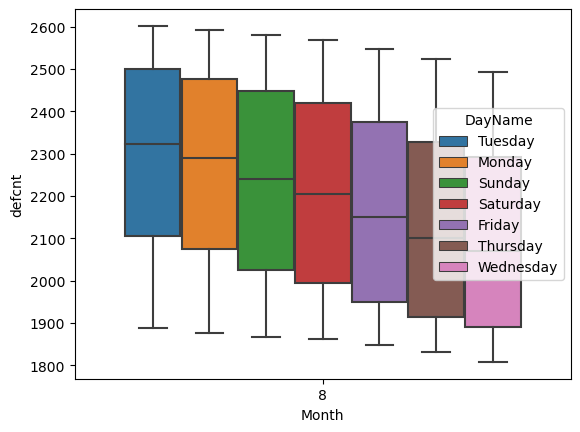

----- 경남 -------


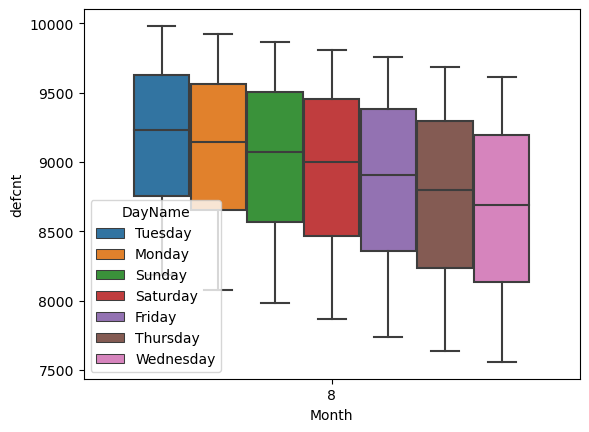

----- 경북 -------


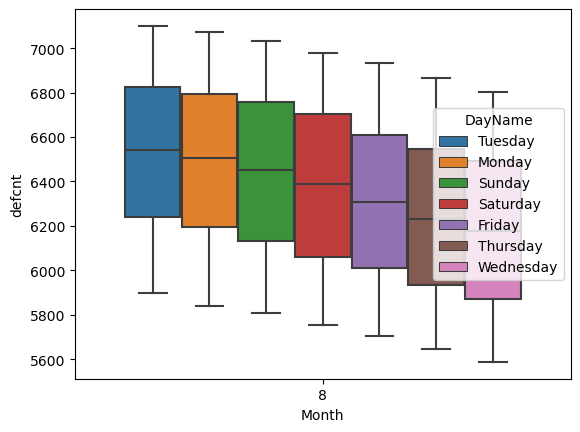

----- 전남 -------


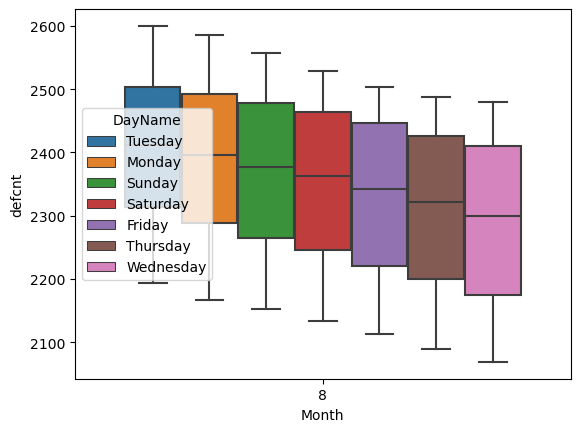

----- 전북 -------


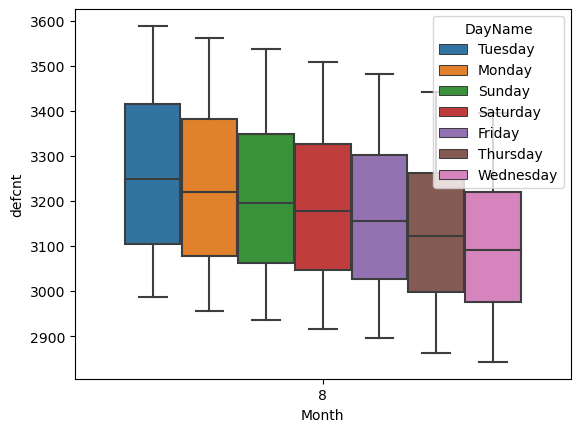

----- 충남 -------


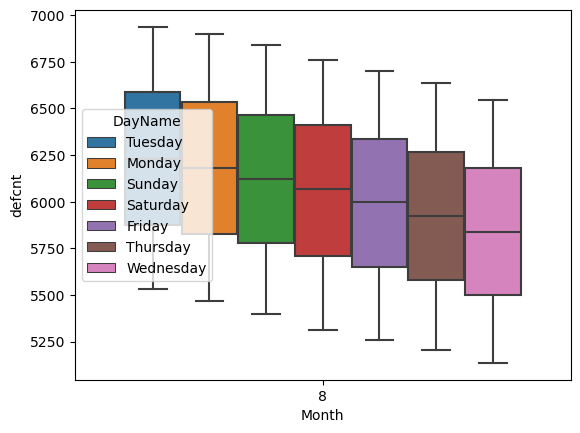

----- 충북 -------


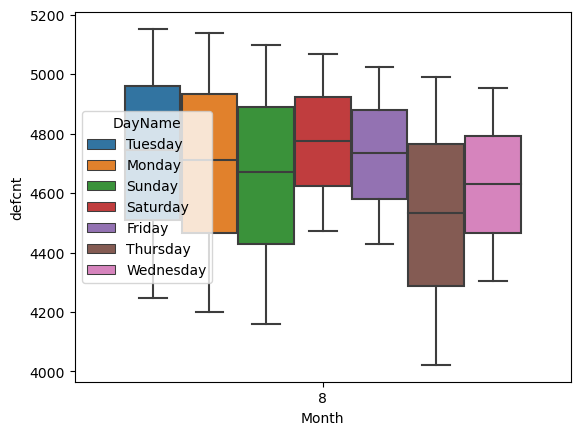

----- 강원 -------


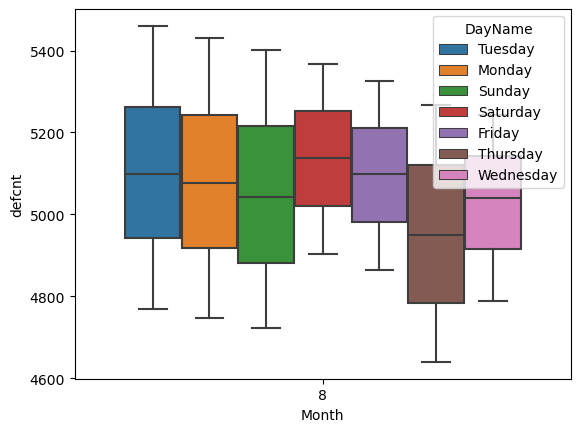

----- 경기 -------


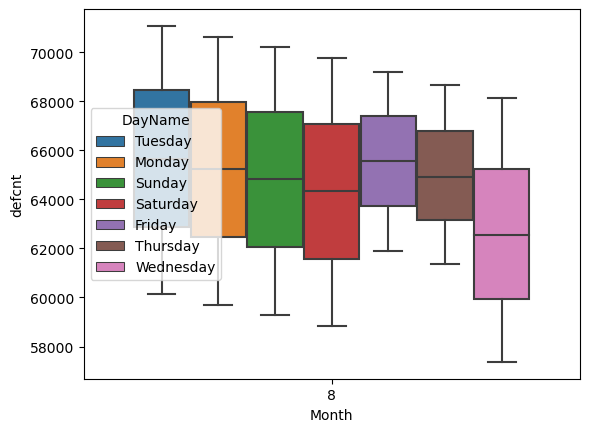

----- 세종 -------


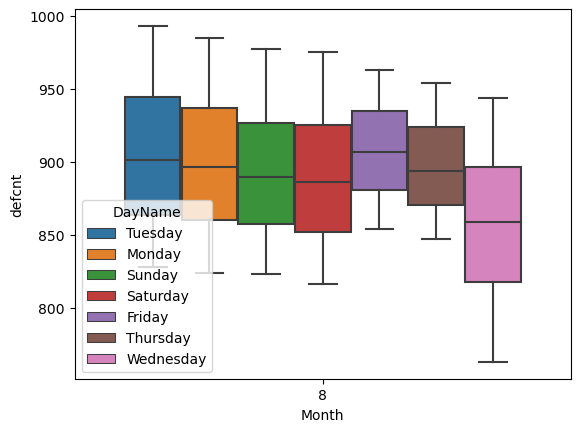

----- 울산 -------


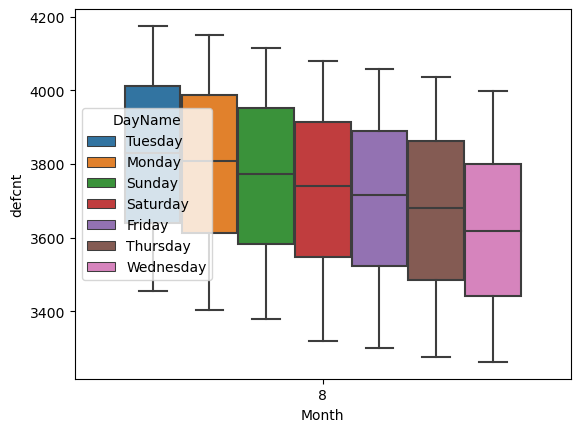

----- 대전 -------


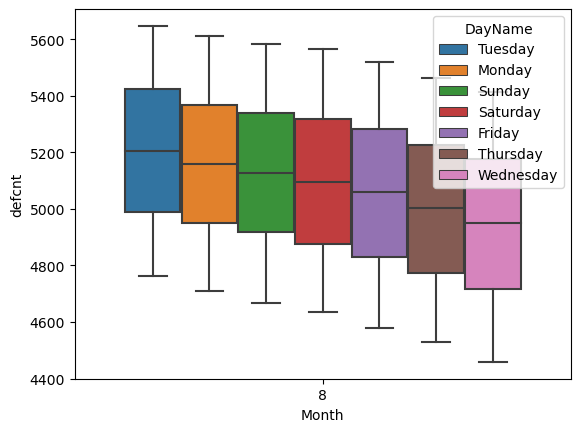

----- 광주 -------


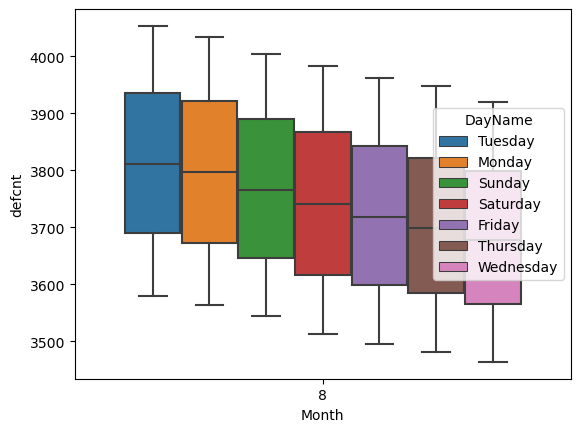

----- 인천 -------


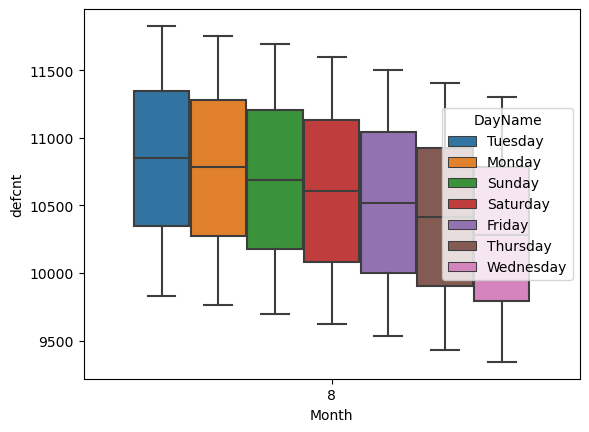

----- 대구 -------


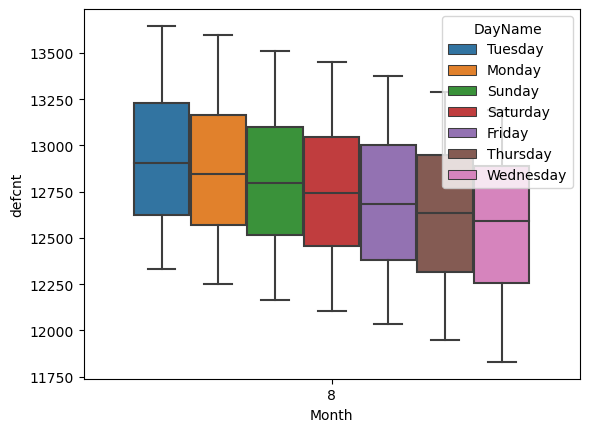

----- 부산 -------


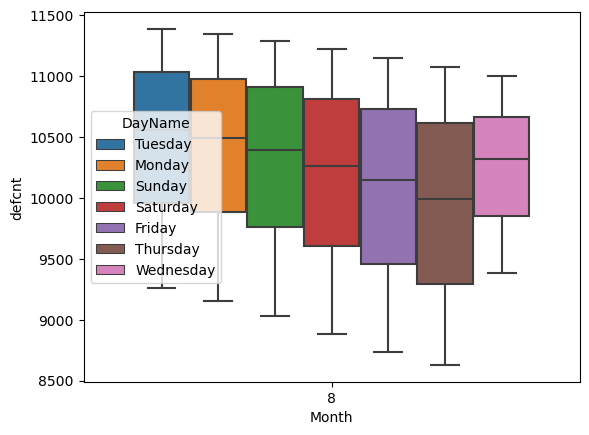

----- 서울 -------


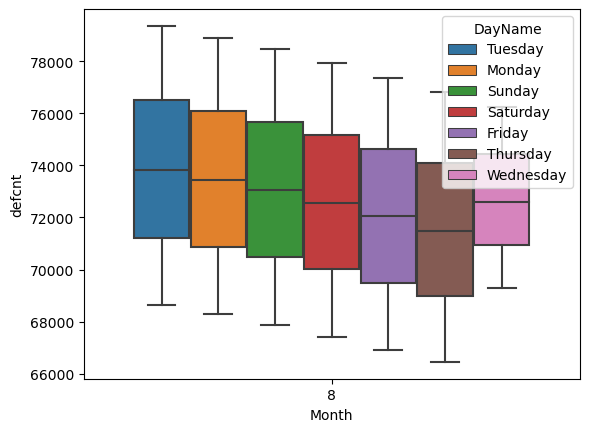

In [120]:
for i in List:
    print(f'-----',i,'-------')
    tmp = newDf[newDf['ji']==i]
    #sns.boxplot(x='DayName', y='defcnt', data=tmp)
    sns.boxplot(x='Month', y='defcnt', hue=tmp['DayName'], data=tmp)
    plt.show()